In [64]:
import copy

import numpy as np
import pandas as pd
from matplotlib import cm
from matplotlib import pyplot as plt

from utils import *

In [2]:
from optimization.range.MethodSven import method_sven_iterations_list
from optimization.range.MethodSven import method_sven

from optimization.range.SearchDichotomous import search_method_dichotomous_iterations_list
from optimization.range.SearchDichotomous import search_dichotomous

from optimization.range.HalvingMethod import halving_method
from optimization.range.HalvingMethod import halving_method_iterations_list

from optimization.range.SearchGoldenSection import search_golden_section
from optimization.range.SearchGoldenSection import search_golden_section_iterations_list

from optimization.range.SearchPitchAdaptation import search_pitch_adaptation
from optimization.range.SearchPitchAdaptation import search_pitch_adaptation_iterations_list
from optimization.range.SearchPitchAdaptation import search_pitch_adaptation_iterations_label

from interpolition.ThreePointQuadratic import threePointQuadratic
from interpolition.ThreePointQuadratic import threePointQuadratic_list
from interpolition.ThreePointQuadratic import threePointQuadratic_label

from interpolition.CubicInterpolation import cubicInterpolation
from interpolition.CubicInterpolation import threePointQuadratic_list
from interpolition.CubicInterpolation import threePointQuadratic_label

from optimization.n_dimensional.CoordinateDescent import get_coordinate_descent
from optimization.n_dimensional.CoordinateDescent import coordinate_descent_iter_list

from optimization.n_dimensional.MethodOfSteepestDescent import get_method_of_steepest_descent

In [5]:
import utils.function

from derivative.derivative import numerical_derivative_1d
from derivative.derivative import numerical_derivative_nd

In [8]:
epsilon = 0.001


def f(x):
    return x ** 2


def nd_f(X):
    return X[0] ** 2 + X[1] ** 2

In [25]:
derivative_f = numerical_derivative_1d(f, epsilon)
derivative_nd_f = numerical_derivative_nd(nd_f, epsilon)

In [32]:
derivative_nd_f([1, 1])

[1, 1]

In [34]:
from utils.function import nd_func_to_1d_func

test_f = nd_func_to_1d_func(nd_f, [1, 1], 0)

In [36]:
test_f(0)

1

In [38]:
derivative_f(1)

2.0009999999996975

In [7]:
import sympy
from sympy import Matrix


def gradient(scalar_function, variables):
    matrix_scalar_function = Matrix([scalar_function])
    return matrix_scalar_function.jacobian(variables)


mf = lambda m: sum(m * m.T)
gradient(mf, 0)

/home/oruel/.local/lib/python3.8/site-packages/sympy/core/sympify.py:449: SymPyDeprecationWarning: 

String fallback in sympify has been deprecated since SymPy 1.6. Use
sympify(str(obj)) or sympy.core.sympify.converter or obj._sympy_
instead. See https://github.com/sympy/sympy/issues/18066 for more
info.

  SymPyDeprecationWarning(


SympifyError: Sympify of expression 'could not parse '<function <lambda> at 0x7f0728c50c10>'' failed, because of exception being raised:
SyntaxError: invalid syntax (<string>, line 1)

In [10]:
from scipy import optimize

x = [1, 1]
optimize.approx_fprime(x, nd_f, epsilon)

array([2.001, 2.001])

In [11]:
ar = np.array([1, 5])
ar

array([1, 5])

In [13]:
ar = np.append(ar, 5)

In [14]:
ar

array([1, 5, 5])

In [17]:
np.cos(np.arctan(optimize.approx_fprime(x, nd_f, epsilon))) * 2

array([0.89406955, 0.89406955])

In [60]:
def to_2d_fun(f, start_g_point, gradient_of_point):
    direction = np.cos(np.arctan(gradient_of_point))
    def res_f(x: float):
        return f(start_g_point + direction * x)

    def point(x: float):
        return start_g_point + direction * x

    return [res_f, point]

In [61]:
def draw_3d_function(f, steps, width, height):
    X, Y = np.meshgrid(np.linspace(-width, width, 30), np.linspace(-height, height, 30))

    fig = plt.figure(figsize=(16, 10))
    ax = fig.gca(projection='3d')

    zs = np.array([f(np.array([x, y])) for x, y in zip(np.ravel(Y), np.ravel(X))])
    Z = zs.reshape(X.shape)

    ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, zorder=2)
    ax.plot(xs=steps[0], ys=steps[1], zs=steps[2],
            marker='*', markersize=20, zorder=3,
            markerfacecolor='y', lw=3, c='black')
    return ax

[-15, -15]
[0.70710678 0.70710678]
0.0
[-15, -15]
[0.70710678 0.70710678]
0.30612244897959184
[-15, -15]
[0.70710678 0.70710678]
0.6122448979591837
[-15, -15]
[0.70710678 0.70710678]
0.9183673469387755
[-15, -15]
[0.70710678 0.70710678]
1.2244897959183674
[-15, -15]
[0.70710678 0.70710678]
1.5306122448979593
[-15, -15]
[0.70710678 0.70710678]
1.836734693877551
[-15, -15]
[0.70710678 0.70710678]
2.142857142857143
[-15, -15]
[0.70710678 0.70710678]
2.4489795918367347
[-15, -15]
[0.70710678 0.70710678]
2.7551020408163267
[-15, -15]
[0.70710678 0.70710678]
3.0612244897959187
[-15, -15]
[0.70710678 0.70710678]
3.36734693877551
[-15, -15]
[0.70710678 0.70710678]
3.673469387755102
[-15, -15]
[0.70710678 0.70710678]
3.979591836734694
[-15, -15]
[0.70710678 0.70710678]
4.285714285714286
[-15, -15]
[0.70710678 0.70710678]
4.591836734693878
[-15, -15]
[0.70710678 0.70710678]
4.8979591836734695
[-15, -15]
[0.70710678 0.70710678]
5.204081632653061
[-15, -15]
[0.70710678 0.70710678]
5.51020408163265

<ipython-input-61-dcb368a27275>:5: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


<Axes3DSubplot:>

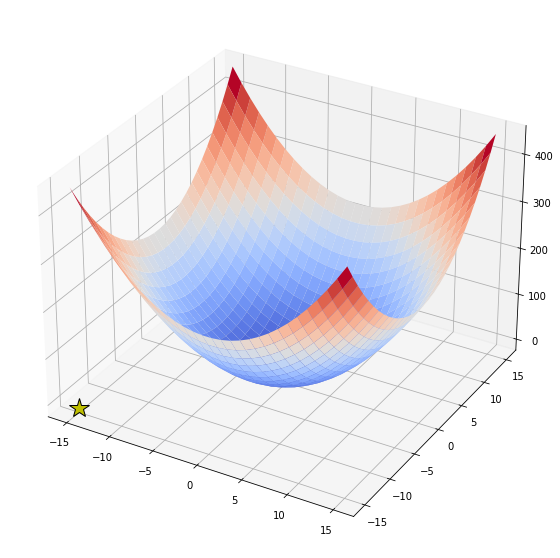

In [67]:
start_p = [-15, -15]
r = to_2d_fun(nd_f, start_p, [1, 1])
x = np.linspace(0, 15)
# r(1)
# X = f_grad
X = [r[1](x_i) for x_i in copy.deepcopy(x)]
Y = [r[0](x_i) for x_i in copy.deepcopy(x)]
steps = np.append(X,Y)
draw_3d_function(nd_f,steps,15,15)
# r[1](x) #steps
# x

In [3]:
from scipy import optimize
def derivative(X):
    return optimize.approx_fprime(X, nd_f, epsilon)
derivative([0,0])

NameError: name 'nd_f' is not defined